In [1]:
import pandas as pd
import torch
import sklearn as sl
import numpy as np
from torch import nn
import sys
sys.path.append(r'C:\Users\Luke\MyRepo\ReviewGPT')
import functions


## Data Download

In [2]:
from adv_functions import downloadData

path_train = r"C:\Users\Luke\MyRepo\Kaggle\Competition_2\Data\train.csv"
path_test = r"C:\Users\Luke\MyRepo\Kaggle\Competition_2\Data\test.csv"

train = downloadData(path_train)
test = downloadData(path_test)

#Set up response and training data
response = pd.get_dummies(train['defects'], drop_first=True, prefix = 'defects')

In [3]:
train.head(5)

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
response

,defects_True
0,0
1,0
2,0
3,1
4,0
...,...
101758,0
101759,0
101760,0
101761,0


**Data Transform**

In [5]:
from adv_functions import transformData

transformed_data = transformData(train)
predictor_var = transformed_data

In [6]:
transformed_data.head(5)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,-0.281081,-0.315495,-0.398384,-0.270813,-0.214178,-0.204322,-0.515840,0.416259,-0.582892,-0.080835,...,-0.085031,-0.150553,-0.131124,-0.466891,-0.196819,0.608021,-0.365178,-0.187761,-0.240607,-0.335782
1,-0.427601,-0.442064,-0.398384,-0.270813,-0.377780,-0.304543,0.283393,-0.473177,-0.282762,-0.104511,...,-0.110447,-0.306231,-0.300546,-0.466891,-0.196819,-0.132769,-0.254462,-0.379080,-0.352195,-0.474548
2,-0.482545,-0.442064,-0.398384,-0.270813,-0.301822,-0.268046,-0.016319,-0.398822,-0.210573,-0.100223,...,-0.105843,-0.384070,-0.300546,-0.466891,-0.196819,0.015389,-0.254462,-0.283421,-0.310350,-0.474548
3,-0.537490,-0.568633,-0.398384,-0.451496,-0.430366,-0.349602,0.782914,-0.597104,-0.424952,-0.106941,...,-0.113056,-0.487856,-0.300546,-0.310209,-0.196819,-0.577243,-0.531252,-0.398212,-0.449835,-0.613314
4,-0.482545,-0.442064,-0.398384,-0.270813,-0.465424,-0.375625,0.683010,-0.570194,-0.662081,-0.107508,...,-0.113664,-0.410017,-0.300546,-0.310209,-0.196819,-0.725401,-0.531252,-0.455607,-0.407989,-0.474548


## Modelling

In [7]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [8]:
response_var_binary_t.shape
x = torch.squeeze(response_var_binary_t,1)


NameError: name 'response_var_binary_t' is not defined

In [ ]:
x.shape

torch.Size([91586])

In [ ]:
response['defects_True']

0         0
1         0
2         0
3         1
4         0
         ..
101758    0
101759    0
101760    0
101761    0
101762    0
Name: defects_True, Length: 101763, dtype: uint8

In [ ]:
predictor_var_t.shape

torch.Size([91586, 21])

In [ ]:
pred_y = model.model(predictor_var_t)
pred_y


tensor([[0.5104],
        [0.5108],
        [0.5064],
        ...,
        [0.5029],
        [0.5040],
        [0.5038]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [ ]:
pred_y-response_var_binary_t

OutOfMemoryError: CUDA out of memory. Tried to allocate 31.25 GiB. GPU 0 has a total capacty of 12.00 GiB of which 10.11 GiB is free. Of the allocated memory 62.83 MiB is allocated by PyTorch, and 21.17 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
(torch.max(pred_y, 10.5) == torch.argmax(x, 1)).float().mean()

tensor(1., device='cuda:0')

In [ ]:
u = torch.squeeze(pred_y,1)
u

tensor([0.5104, 0.5108, 0.5064,  ..., 0.5029, 0.5040, 0.5038], device='cuda:0',
       grad_fn=<SqueezeBackward1>)

In [ ]:
response_var_binary_t

tensor([1, 0, 0,  ..., 0, 0, 0], device='cuda:0')

In [ ]:
x = torch.unsqueeze(response_var_binary_t,1)
x

tensor([[1],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], device='cuda:0')

In [ ]:
Y_test_t

tensor([[0],
        [1],
        [0],
        ...,
        [0],
        [0],
        [0]], device='cuda:0')

In [ ]:
torch.argmax(pred_y, 1)

tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')

In [ ]:
weights

tensor([1.0000, 0.2929, 0.2929,  ..., 0.2929, 0.2929, 0.2929], device='cuda:0')

In [15]:
from adv_functions import NeuralNetwork
from sklearn.model_selection import train_test_split
from adv_functions import  classificationWeightCalculator

#Create test and train datasets
X_train_binary, X_test_binary, Y_train_binary, Y_test_binary = train_test_split(predictor_var, response, test_size=0.1, random_state=42, stratify=response)

#We need to first rebalance the transformed dataset.
weights_train = classificationWeightCalculator("defects_True", Y_train_binary, device = device)
weights_test = classificationWeightCalculator("defects_True", Y_test_binary, device = device)

#Create tensors
response_var_binary_t = torch.tensor(Y_train_binary.values, dtype = torch.long).to(device)
response_var_binary_t = torch.squeeze(response_var_binary_t, 1)
predictor_var_t = torch.tensor(X_train_binary.values, dtype = torch.float).to(device)

#Create model
n_columns = len(transformed_data.columns)

model = NeuralNetwork(n_input = n_columns, n_hidden_layer = n_columns, n_output = 1, learning_rate = 0.001, weights_train = weights_train, weights_test = weights_test).to(device)
print(model)

0    0.293058
1    1.000000
Name: defects_True, dtype: float64
0    0.293139
1    1.000000
Name: defects_True, dtype: float64
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=21, out_features=21, bias=False)
    (1): Linear(in_features=21, out_features=21, bias=False)
    (2): Linear(in_features=21, out_features=21, bias=False)
    (3): Linear(in_features=21, out_features=1, bias=False)
    (4): Sigmoid()
  )
  (loss_function_train): NLLLoss()
  (loss_function_test): NLLLoss()
)


250 iterations complete, current test accuracy: 0.31, curr entropy: -0.5131831169128418
250 iterations complete, current test accuracy: 0.37, curr entropy: -0.5204389095306396
250 iterations complete, current test accuracy: 0.45, curr entropy: -0.5290566682815552
250 iterations complete, current test accuracy: 0.54, curr entropy: -0.5396813750267029
250 iterations complete, current test accuracy: 0.61, curr entropy: -0.553231418132782
250 iterations complete, current test accuracy: 0.65, curr entropy: -0.5710453987121582
250 iterations complete, current test accuracy: 0.67, curr entropy: -0.5950759053230286
250 iterations complete, current test accuracy: 0.68, curr entropy: -0.6280303001403809
250 iterations complete, current test accuracy: 0.69, curr entropy: -0.6730121374130249
250 iterations complete, current test accuracy: 0.69, curr entropy: -0.7314163446426392
250 iterations complete, current test accuracy: 0.69, curr entropy: -0.7981919050216675
250 iterations complete, current 

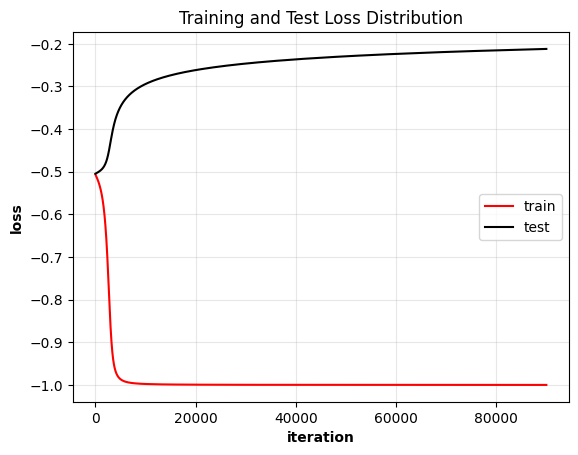

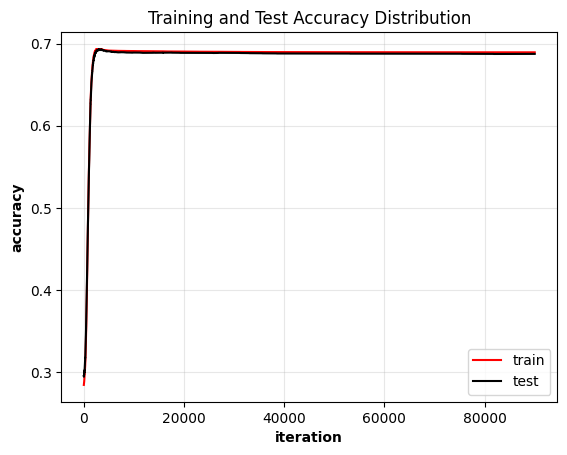

best accuracy achieved at iteration 2953 with accuracy 0.69


In [16]:
#Convert test data to tensors
Y_test_t = torch.tensor(Y_test_binary.values, dtype = torch.long).to(device)
Y_test_t = torch.squeeze(Y_test_t, 1)
X_test_t = torch.tensor(X_test_binary.values, dtype = torch.float).to(device)

model.train(x_train = predictor_var_t, y_train = response_var_binary_t, x_test = X_test_t, y_test = Y_test_t, batch_size=90000)

## Model Diagnostics ##

In [17]:
from utils import accuracy

X_test_binary_t = torch.tensor(X_test_binary.values, dtype = torch.float32).to(device)

predictions_binary = model.model(X_test_binary_t).detach().cpu().numpy()
#Turn probability into prediction
predictions_binary = np.where(predictions_binary > 0.5, 1, 0)

accuracy(Y_test_binary, predictions_binary)

Accuracy: 0.6929350496216959
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      7870
           1       0.38      0.54      0.44      2307

    accuracy                           0.69     10177
   macro avg       0.61      0.64      0.62     10177
weighted avg       0.74      0.69      0.71     10177



In [ ]:
from utils import confusionMatrix

confusionMatrix(Y_test_binary, predictions_binary)

Confusion Matrix:

False Positives: 156
False Negatives: 166
True Positives: 967
True Negatives: 977
